In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo CSV
df = pd.read_csv('Integracion_con_patógenos_y_enfermedades_Lactobacillus_Acidophillus_KLDS1.0901.csv')
# Mostrar las primeras filas y la informaci\u00f3n del DataFrame
df.head()


,Genes,DisGeNET_Term,DisGeNET_Pvalue,GeDiPNet_Term,GeDiPNet_Pvalue,Orphanet_Term,Orphanet_Pvalue,Virus_Host_Term,Virus_Host_Pvalue,Host organism(s)_Intact,Confidence value(s)_Intact,Taxid interactor A_Intact,Taxid interactor B_Intact
0,ALDH1A3,Non-Small Cell Lung Carcinoma; Malignant neopl...,0.00015781533447203308; 0.00020620773053226895...,Isolated Microphthalmia-Anophthalmia-Coloboma;...,0.0013993412035435; 0.0016220171811421; 0.0021...,Intermediate generalized junctional epidermoly...,0.0198518267597581; 0.0198518267597581; 0.0200...,NaN,NaN,NaN,NaN,NaN,NaN
1,CXCL8,Epstein-Barr Virus Infections; Kaposi Sarcoma;...,6.270267096516998e-06; 1.649413218688848e-05; ...,Pancreatic Neoplasm; Cholestasis; Stomach Neop...,0.00030596902992034974; 0.0005044025015081611;...,Charcot-Marie-Tooth disease type 1D ORPHA:1010...,0.0001505037678013201; 0.0001505037678013201; ...,Cercopithecine betaherpesvirus 5 chemokine vCX...,0.0035953576273759; 0.010161706815005; 0.01135...,Homo sapiens HLMVEC lung microvascular endothe...,0.61,Homo sapiens;chemical synthesis,Homo sapiens;chemical synthesis
2,EGR1,Epstein-Barr Virus Infections; Kaposi Sarcoma;...,6.270267096516998e-06; 1.649413218688848e-05; ...,Cholestasis; Intrahepatic Cholestasis; Liver C...,0.0005044025015081611; 0.0031963509494465; 0.0...,Charcot-Marie-Tooth disease type 1D ORPHA:1010...,0.0001505037678013201; 0.0001505037678013201,Human papillomavirus 172 E7; Human papillomavi...,0.0047916600118212; 0.0061859857715872; 0.0061...,yeasx,0.37,Homo sapiens,Bacillus anthracis;Homo sapiens
3,SLC12A3,Epstein-Barr Virus Infections; Kaposi Sarcoma;...,6.270267096516998e-06; 1.649413218688848e-05; ...,Pancreatic Neoplasm; Hypermagnesemia; Nocturia...,0.00030596902992034974; 0.0013993412035435; 0....,UMOD-related autosomal dominant tubulointersti...,0.0200488406552823; 0.0202458248516149,NaN,NaN,In vitro,0.35,chemical synthesis,Homo sapiens


      Gene                           DisGeNET_Term_categories  \
0  ALDH1A3  Cáncer, Enfermedades asociadas a la microbiota...   
1    CXCL8  Cáncer, Enfermedades asociadas a la microbiota...   
2     EGR1  Cáncer, Enfermedades asociadas a la microbiota...   
3  SLC12A3  Cáncer, Enfermedades asociadas a la microbiota...   

                            GeDiPNet_Term_categories  \
0  Cáncer, Otras Enfermedades, Enfermedades Neuro...   
1  Cáncer, Enfermedades Inmunológicas, Otras Enfe...   
2  Cáncer, Otras Enfermedades, Enfermedades Inmun...   
3  Cáncer, Otras Enfermedades, Enfermedades Cardi...   

                            Orphanet_Term_categories  
0  Cáncer, Otras Enfermedades, Trastornos de la P...  
1  Cáncer, Otras Enfermedades, Trastornos de la P...  
2                                 Otras Enfermedades  
3                                 Otras Enfermedades  
Gráfico guardado como 'disease_categories_barplot.png'


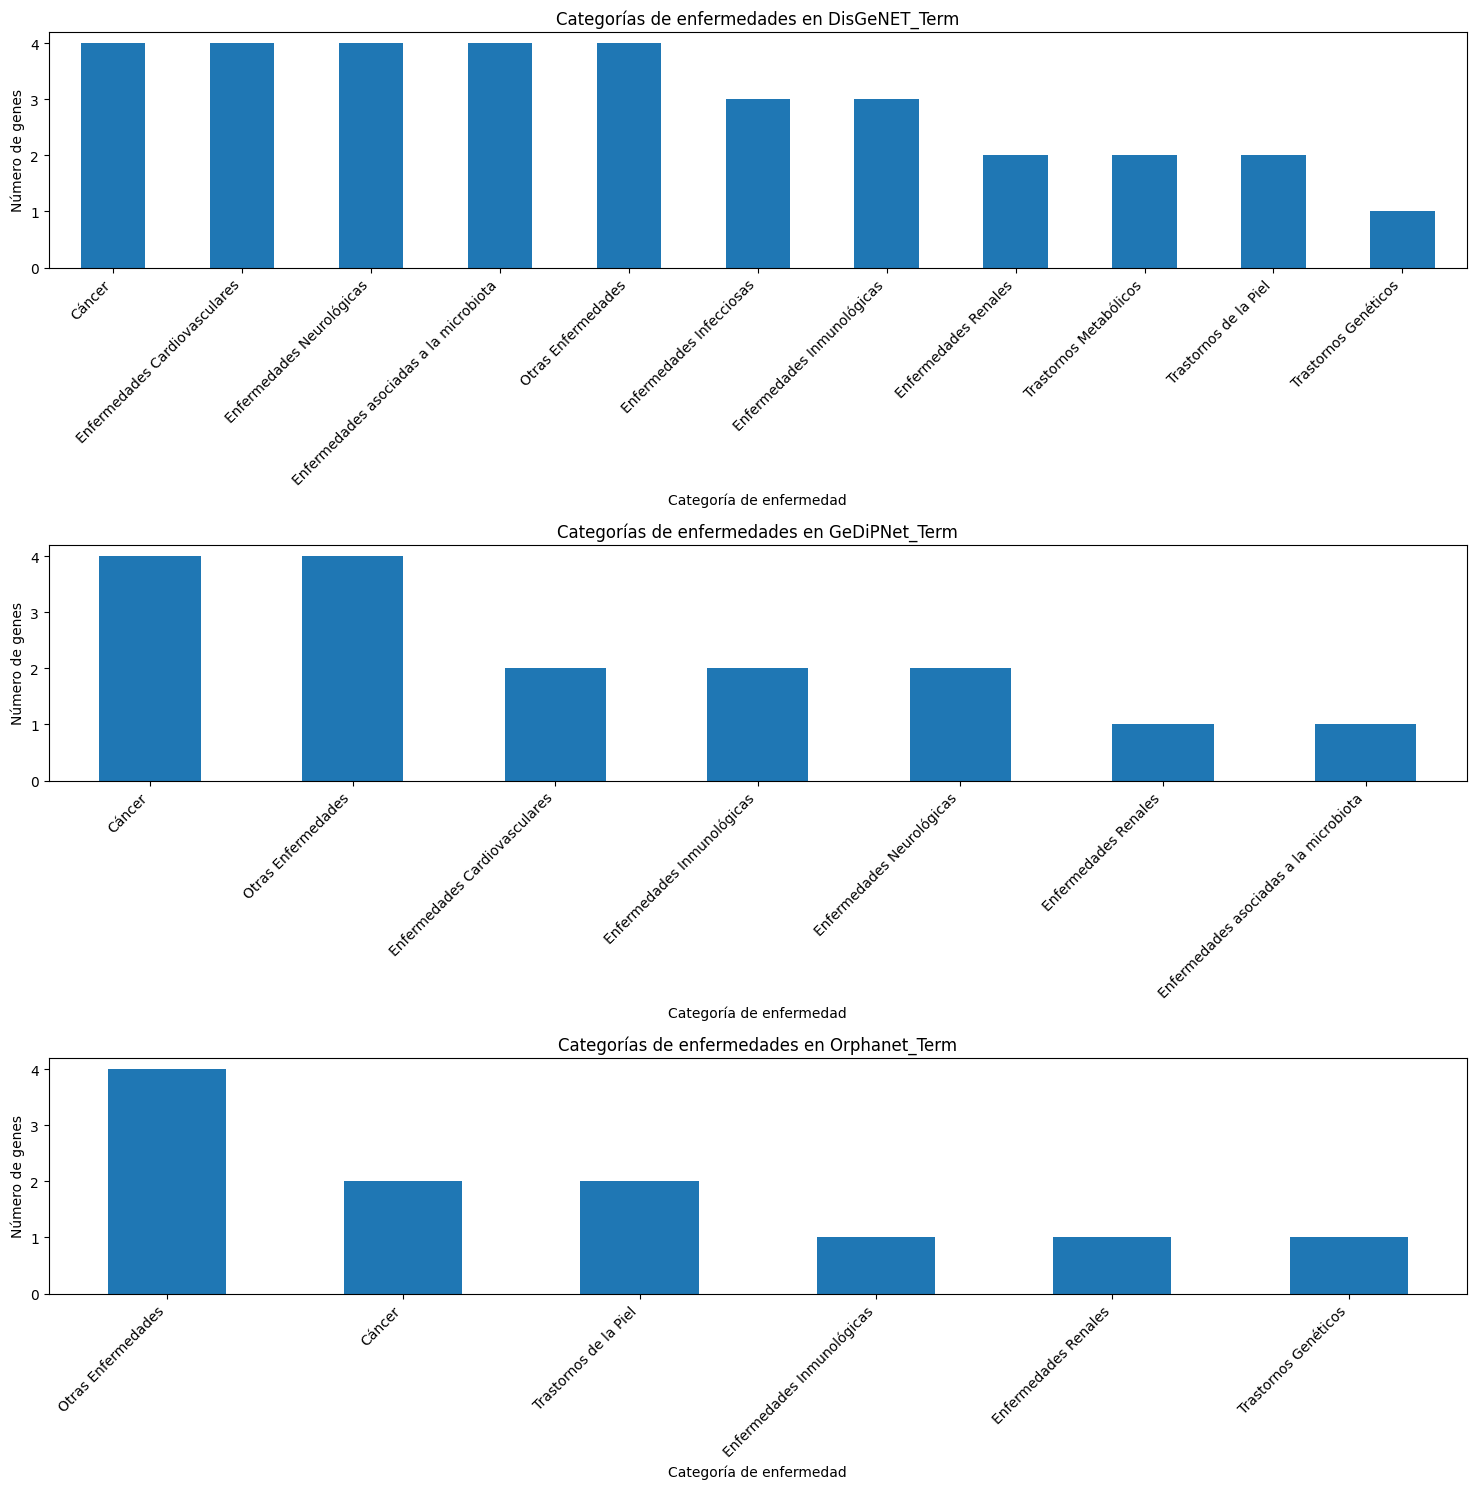

In [3]:
# Definir categorías de enfermedades
categories = {
    "Cáncer": ["carcinoma", "cancer", "tumor", "neoplasm", "leukemia", "lymphoma", "sarcoma", "melanoma"],
    "Enfermedades Infecciosas": ["infection", "viral", "bacterial", "fungal", "parasitic", "malaria", "HIV", "bacteria", "tuberculosis"],
    "Enfermedades Inmunológicas": ["autoimmune", "lupus", "rheumatoid", "asthma", "allergy", "immunodeficiency"],
    "Enfermedades Neurológicas": ["neurological", "amyotrophic", "parkinson", "alzheimer", "epilepsy", "schizophrenia", "bipolar disorder", "autism"],
    "Enfermedades Cardiovasculares": ["cardiovascular", "heart", "hypertension", "myocardial", "stroke", "angina"],
    "Enfermedades Renales": ["kidney failure", "nephropathy", "glomerulonephritis", "nephrotic syndrome"],
    "Trastornos Metabólicos": ["amyloidosis", "glycogen storage disease", "citrullinemia"],
    "Trastornos Genéticos": ["Ehlers-Danlos syndrome", "Charcot-Marie-Tooth disease", "epidermolysis bullosa"],
    "Trastornos de la Piel": ["dermatitis", "ichthyosis", "erythrokeratodermia"],
    "Enfermedades asociadas a la microbiota": [
        "dysbiosis", "gut microbiota", "intestinal microbiota", "helicobacter pylori", "necrotizing enterocolitis", 
        "inflammatory bowel disease", "celiac disease", "acute diarrhea", "non-alcoholic fatty liver disease", 
        "irritable bowel syndrome", "obesity", "diabetes", "inflammatory intestinal disease", 
        "stress", "anxiety", "digestive system", "poor diet", "fiber deficiency", 
        "sedentarism", "alcohol", "tobacco", "diarrhea", "cramps", "constipation"
    ],
    "Otras Enfermedades": []  # Aquí se incluirán enfermedades no clasificadas anteriormente
}

def classify_disease(disease):
    # Verificar si la enfermedad es NaN o si es "Sin información"
    if pd.isna(disease) or disease.lower() == "sin información":
        return "Sin información"
    
    # Convertir a minúsculas para una comparación insensible a mayúsculas/minúsculas
    disease = disease.lower()
    
    # Buscar coincidencias en las categorías definidas
    for category, keywords in categories.items():
        if any(keyword in disease for keyword in keywords):
            return category
            
    # Si no se encontró coincidencia, retornar "Otras Enfermedades"
    return "Otras Enfermedades"

def process_disease_column(column):
    if pd.isna(column):
        return ["Sin información"]
    diseases = column.split(';')
    return [disease.strip() for disease in diseases]

# Procesar columnas de enfermedades
disease_columns = ['DisGeNET_Term', 'GeDiPNet_Term', 'Orphanet_Term']

for col in disease_columns:
    df[f'{col}_processed'] = df[col].apply(process_disease_column)
    df[f'{col}_categories'] = df[f'{col}_processed'].apply(lambda x: [classify_disease(disease) for disease in x])

# Crear un nuevo DataFrame con el mapeo
gene_disease_mapping = pd.DataFrame()
gene_disease_mapping['Gene'] = df['Genes']

for col in disease_columns:
    gene_disease_mapping[f'{col}_categories'] = df[f'{col}_categories'].apply(lambda x: ', '.join(set(x)))

# Mostrar las primeras filas del nuevo DataFrame
print(gene_disease_mapping.head())

# Contar las categorías de enfermedades para cada fuente, excluyendo "Sin información"
category_counts = {}
for col in disease_columns:
    # Excluir "Sin información"
    filtered_categories = gene_disease_mapping[f'{col}_categories'].apply(
        lambda x: ', '.join([cat for cat in x.split(', ') if cat != 'Sin información'])
    )
    # Contar las categorías
    category_counts[col] = filtered_categories.str.get_dummies(sep=', ').sum().sort_values(ascending=False)

# Crear un gráfico de barras para cada fuente de enfermedades
fig, axes = plt.subplots(len(disease_columns), 1, figsize=(15, 5 * len(disease_columns)))

for i, (source, counts) in enumerate(category_counts.items()):
    ax = axes[i]
    if counts.empty:
        ax.text(0.5, 0.5, 'No hay datos para graficar', horizontalalignment='center', verticalalignment='center', fontsize=12)
        ax.set_title(f'Categorías de enfermedades en {source}')
        ax.set_xlabel('Categoría de enfermedad')
        ax.set_ylabel('Número de genes')
    else:
        counts.plot(kind='bar', ax=ax)
        ax.set_title(f'Categorías de enfermedades en {source}')
        ax.set_xlabel('Categoría de enfermedad')
        ax.set_ylabel('Número de genes')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('disease_categories_barplot.png')
print("Gráfico guardado como 'disease_categories_barplot.png'")


Heatmap guardado como 'protein_interaction_heatmap.png'


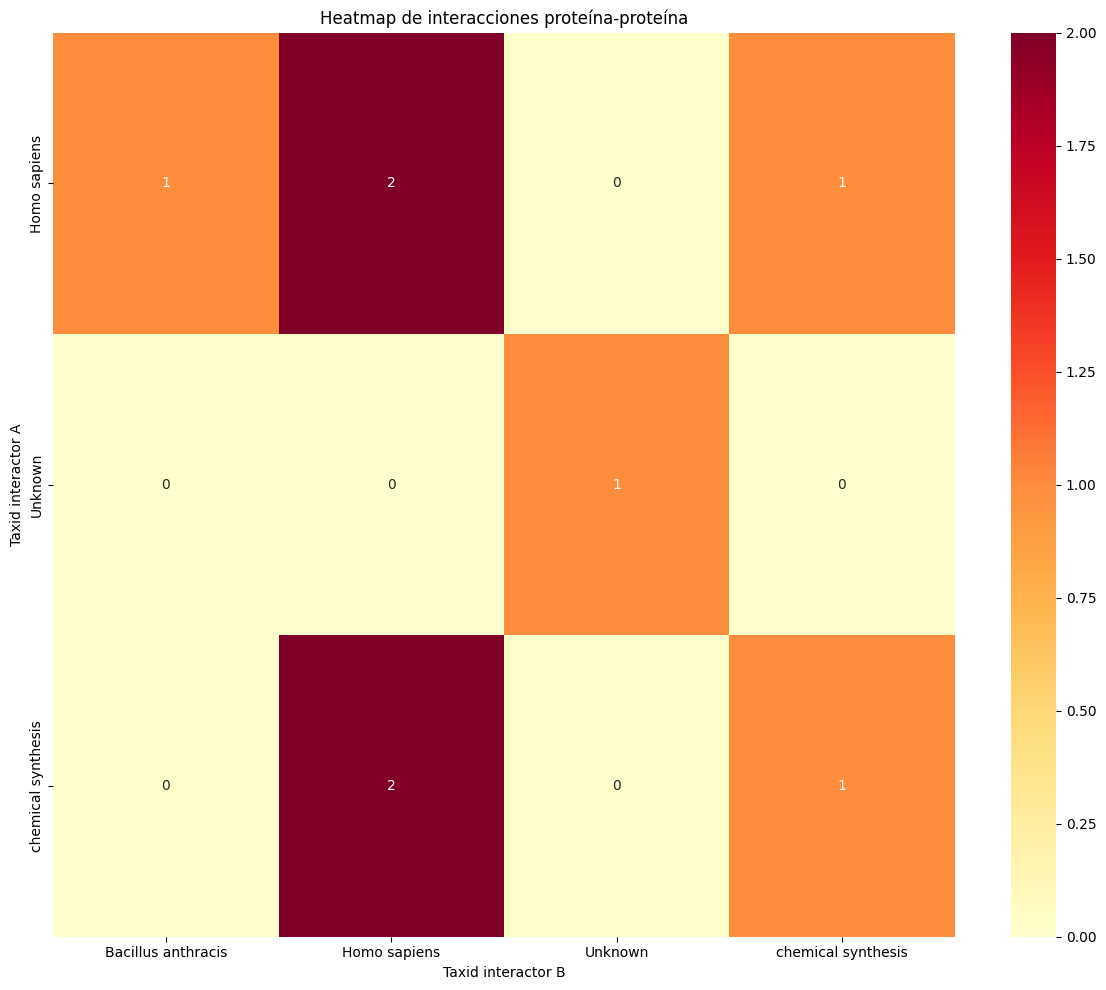

In [7]:
# Función para procesar los campos de taxa que pueden tener múltiples valores separados por ';'
def process_taxid_column(column):
    taxa = column.split(';')
    return [taxon.strip() for taxon in taxa]

# Procesar las columnas de interacciones para manejar múltiples taxones
interaction_df = df[['Genes', 'Taxid interactor A_Intact', 'Taxid interactor B_Intact']].copy()

# Rellenar valores nulos con 'Unknown' y separar los taxones
interaction_df['Taxid interactor A_Intact'] = interaction_df['Taxid interactor A_Intact'].fillna('Unknown').apply(process_taxid_column)
interaction_df['Taxid interactor B_Intact'] = interaction_df['Taxid interactor B_Intact'].fillna('Unknown').apply(process_taxid_column)

# Expandir el DataFrame para tener una fila por cada combinación de taxa en interactor A e interactor B
interaction_df = interaction_df.explode('Taxid interactor A_Intact').explode('Taxid interactor B_Intact')

# Crear la matriz de interacciones
interaction_matrix = pd.crosstab(interaction_df['Taxid interactor A_Intact'], interaction_df['Taxid interactor B_Intact'])

# Generar el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(interaction_matrix, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap de interacciones proteína-proteína')
plt.xlabel('Taxid interactor B')
plt.ylabel('Taxid interactor A')
plt.tight_layout()
plt.savefig('protein_interaction_heatmap.png')
print("Heatmap guardado como 'protein_interaction_heatmap.png'")



Contenido de confidence_matrix:
Taxid interactor B_Intact Unknown
Taxid interactor A_Intact        
Unknown                       0.0


C:\Users\3060\AppData\Local\Temp\ipykernel_9480\3180631734.py:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  confidence_matrix = confidence_matrix.fillna(0)


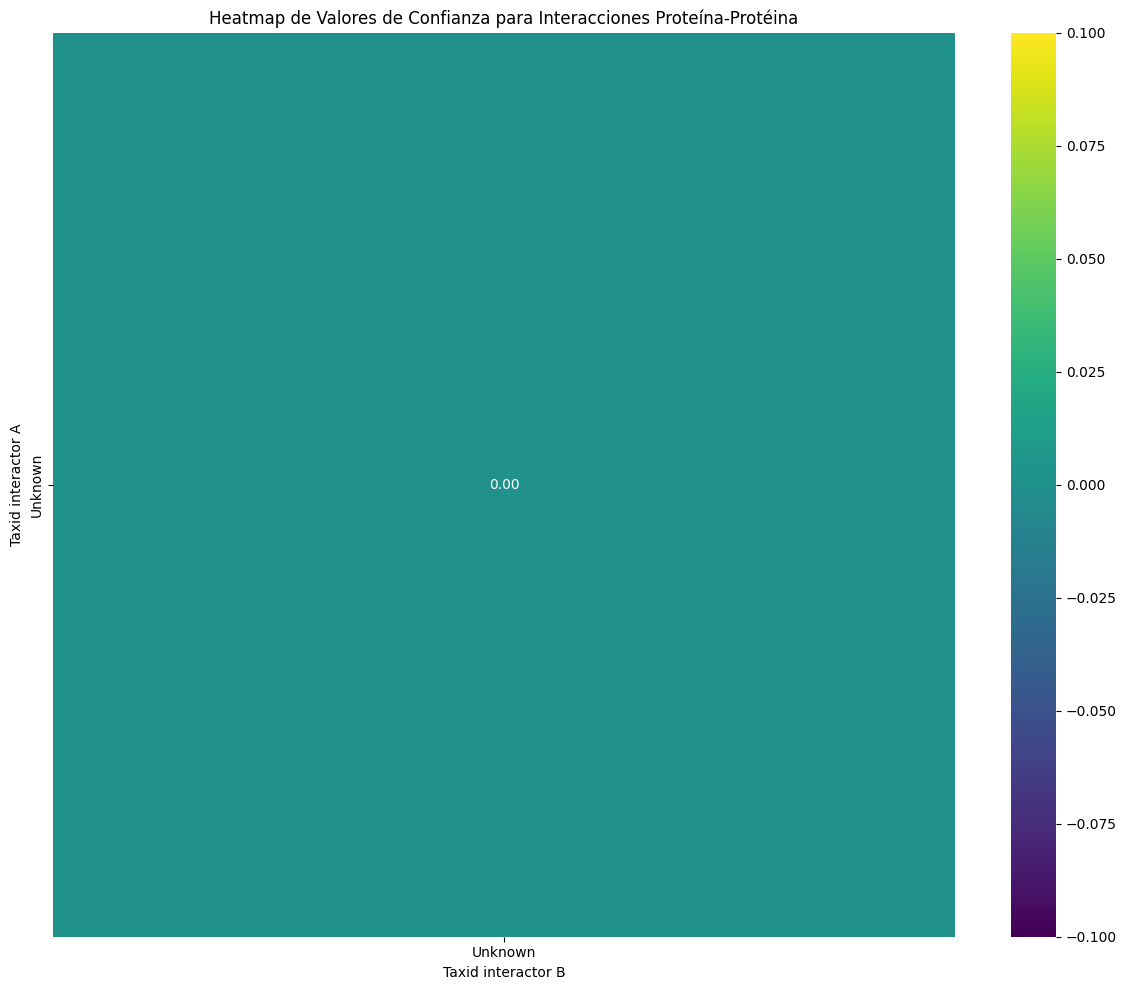

In [8]:


# Función para procesar columnas que contienen listas separadas por ";"
def process_column(column):
    if isinstance(column, str):
        return [item.strip() for item in column.split(';')]
    return []

# Función para procesar las columnas de confianza
def process_confidence_column(column):
    if isinstance(column, str):
        return [float(conf) for conf in process_column(column)]
    return []

# Procesar las columnas de interacciones para manejar múltiples taxones
interaction_df = df[['Genes', 'Taxid interactor A_Intact', 'Taxid interactor B_Intact', 'Confidence value(s)_Intact', 'Host organism(s)_Intact']].copy()

# Procesar las columnas de interacciones para manejar múltiples valores
interaction_df['Taxid interactor A_Intact'] = interaction_df['Taxid interactor A_Intact'].fillna('Unknown').apply(process_column)
interaction_df['Taxid interactor B_Intact'] = interaction_df['Taxid interactor B_Intact'].fillna('Unknown').apply(process_column)
interaction_df['Confidence value(s)_Intact'] = interaction_df['Confidence value(s)_Intact'].fillna('0').apply(process_confidence_column)

# Expandir el DataFrame para tener una fila por cada combinación de taxones y valores de confianza
interaction_df = interaction_df.explode('Taxid interactor A_Intact')
interaction_df = interaction_df.explode('Taxid interactor B_Intact')
interaction_df = interaction_df.explode('Confidence value(s)_Intact')

# Asegurarse de que las columnas no contengan listas
interaction_df['Taxid interactor A_Intact'] = interaction_df['Taxid interactor A_Intact'].astype(str)
interaction_df['Taxid interactor B_Intact'] = interaction_df['Taxid interactor B_Intact'].astype(str)

# Crear la matriz de confianza entre Taxid interactor A y Taxid interactor B
confidence_matrix = pd.pivot_table(interaction_df, values='Confidence value(s)_Intact', index='Taxid interactor A_Intact', columns='Taxid interactor B_Intact', aggfunc='mean')

# Verificar el contenido de la matriz de confianza
print("Contenido de confidence_matrix:")
print(confidence_matrix)

# Manejar valores NaN en la matriz de confianza
confidence_matrix = confidence_matrix.fillna(0)

# Generar el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(confidence_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap de Valores de Confianza para Interacciones Proteína-Protéina')
plt.xlabel('Taxid interactor B')
plt.ylabel('Taxid interactor A')
plt.tight_layout()
plt.savefig('protein_interaction_confidence_heatmap.png')
plt.show()  # Mostrar el gráfico en lugar de solo guardarlo





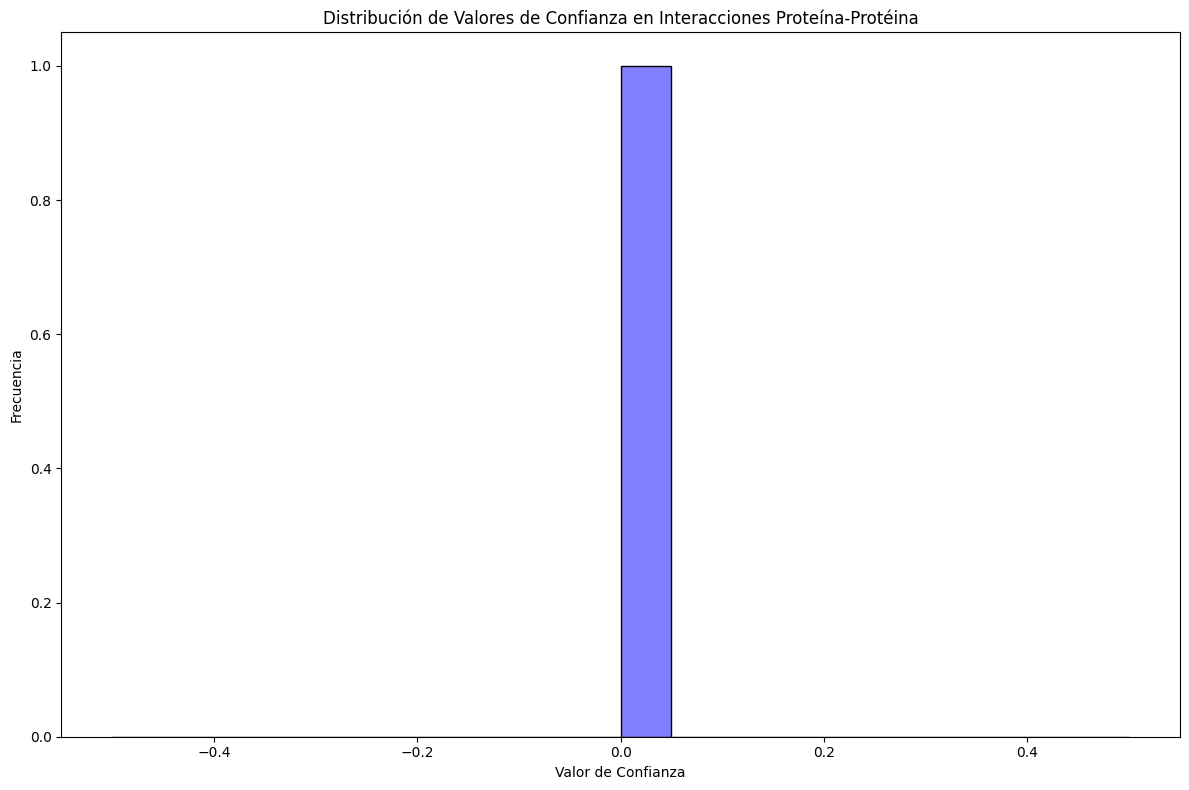

In [9]:
# Asumiendo que 'interaction_df' ya está procesado
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras para la distribución de valores de confianza
sns.histplot(interaction_df['Confidence value(s)_Intact'], bins=20, kde=True, color='b')
plt.title('Distribución de Valores de Confianza en Interacciones Proteína-Protéina')
plt.xlabel('Valor de Confianza')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.savefig('confidence_distribution_bar_plot.png')
plt.show()

Taxid interactor A_Intact      object
Taxid interactor B_Intact      object
Confidence value(s)_Intact    float64
dtype: object
(1, 3)


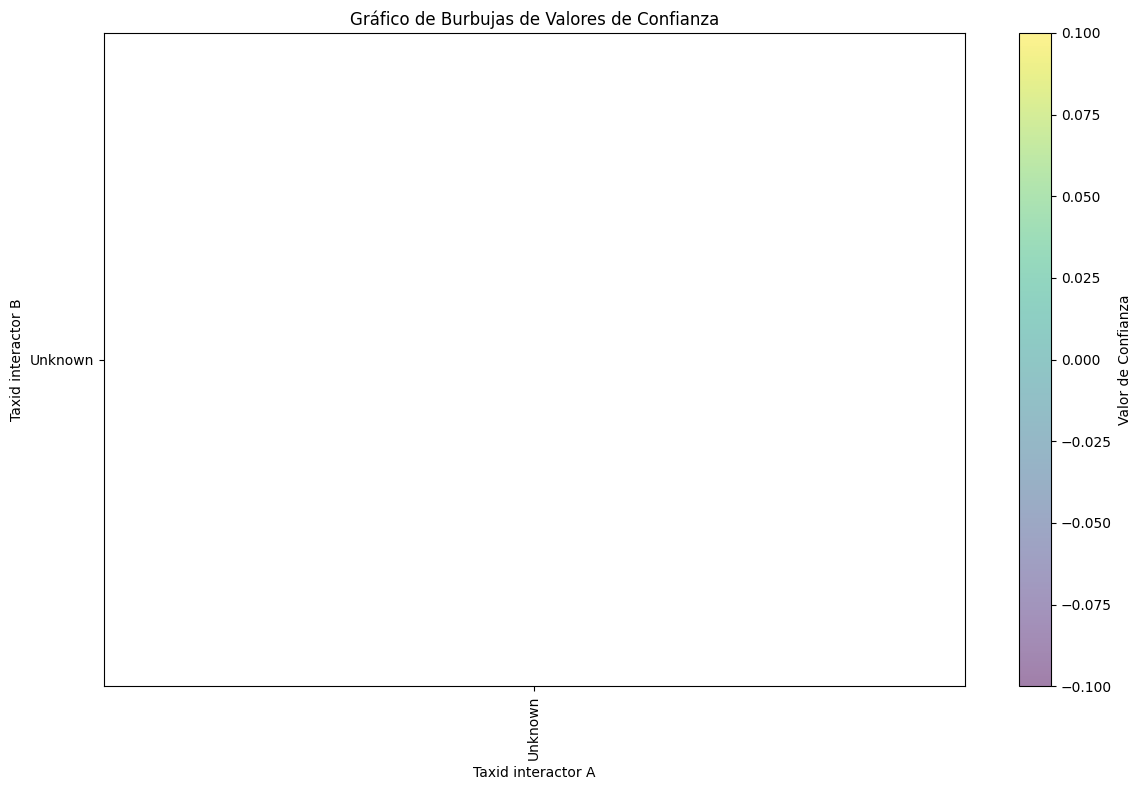

In [10]:
# Convertir la columna 'Confidence value(s)_Intact' a tipo numérico
interaction_df['Confidence value(s)_Intact'] = pd.to_numeric(interaction_df['Confidence value(s)_Intact'], errors='coerce')

# Eliminar filas con valores nulos en 'Confidence value(s)_Intact'
interaction_df = interaction_df.dropna(subset=['Confidence value(s)_Intact'])

# Verificar los tamaños y tipos después de la conversión
print(interaction_df[['Taxid interactor A_Intact', 'Taxid interactor B_Intact', 'Confidence value(s)_Intact']].dtypes)
print(interaction_df[['Taxid interactor A_Intact', 'Taxid interactor B_Intact', 'Confidence value(s)_Intact']].shape)

# Crear el gráfico de burbujas
plt.figure(figsize=(12, 8))

plt.scatter(
    interaction_df['Taxid interactor A_Intact'],
    interaction_df['Taxid interactor B_Intact'],
    s=interaction_df['Confidence value(s)_Intact'] * 100,  # Tamaño de la burbuja
    alpha=0.5,
    c=interaction_df['Confidence value(s)_Intact'],  # Color según el valor de confianza
    cmap='viridis',  # Mapa de colores
    edgecolors='w'
)

plt.title('Gráfico de Burbujas de Valores de Confianza')
plt.xlabel('Taxid interactor A')
plt.ylabel('Taxid interactor B')
plt.colorbar(label='Valor de Confianza')

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('confidence_bubble_chart.png')
plt.show()

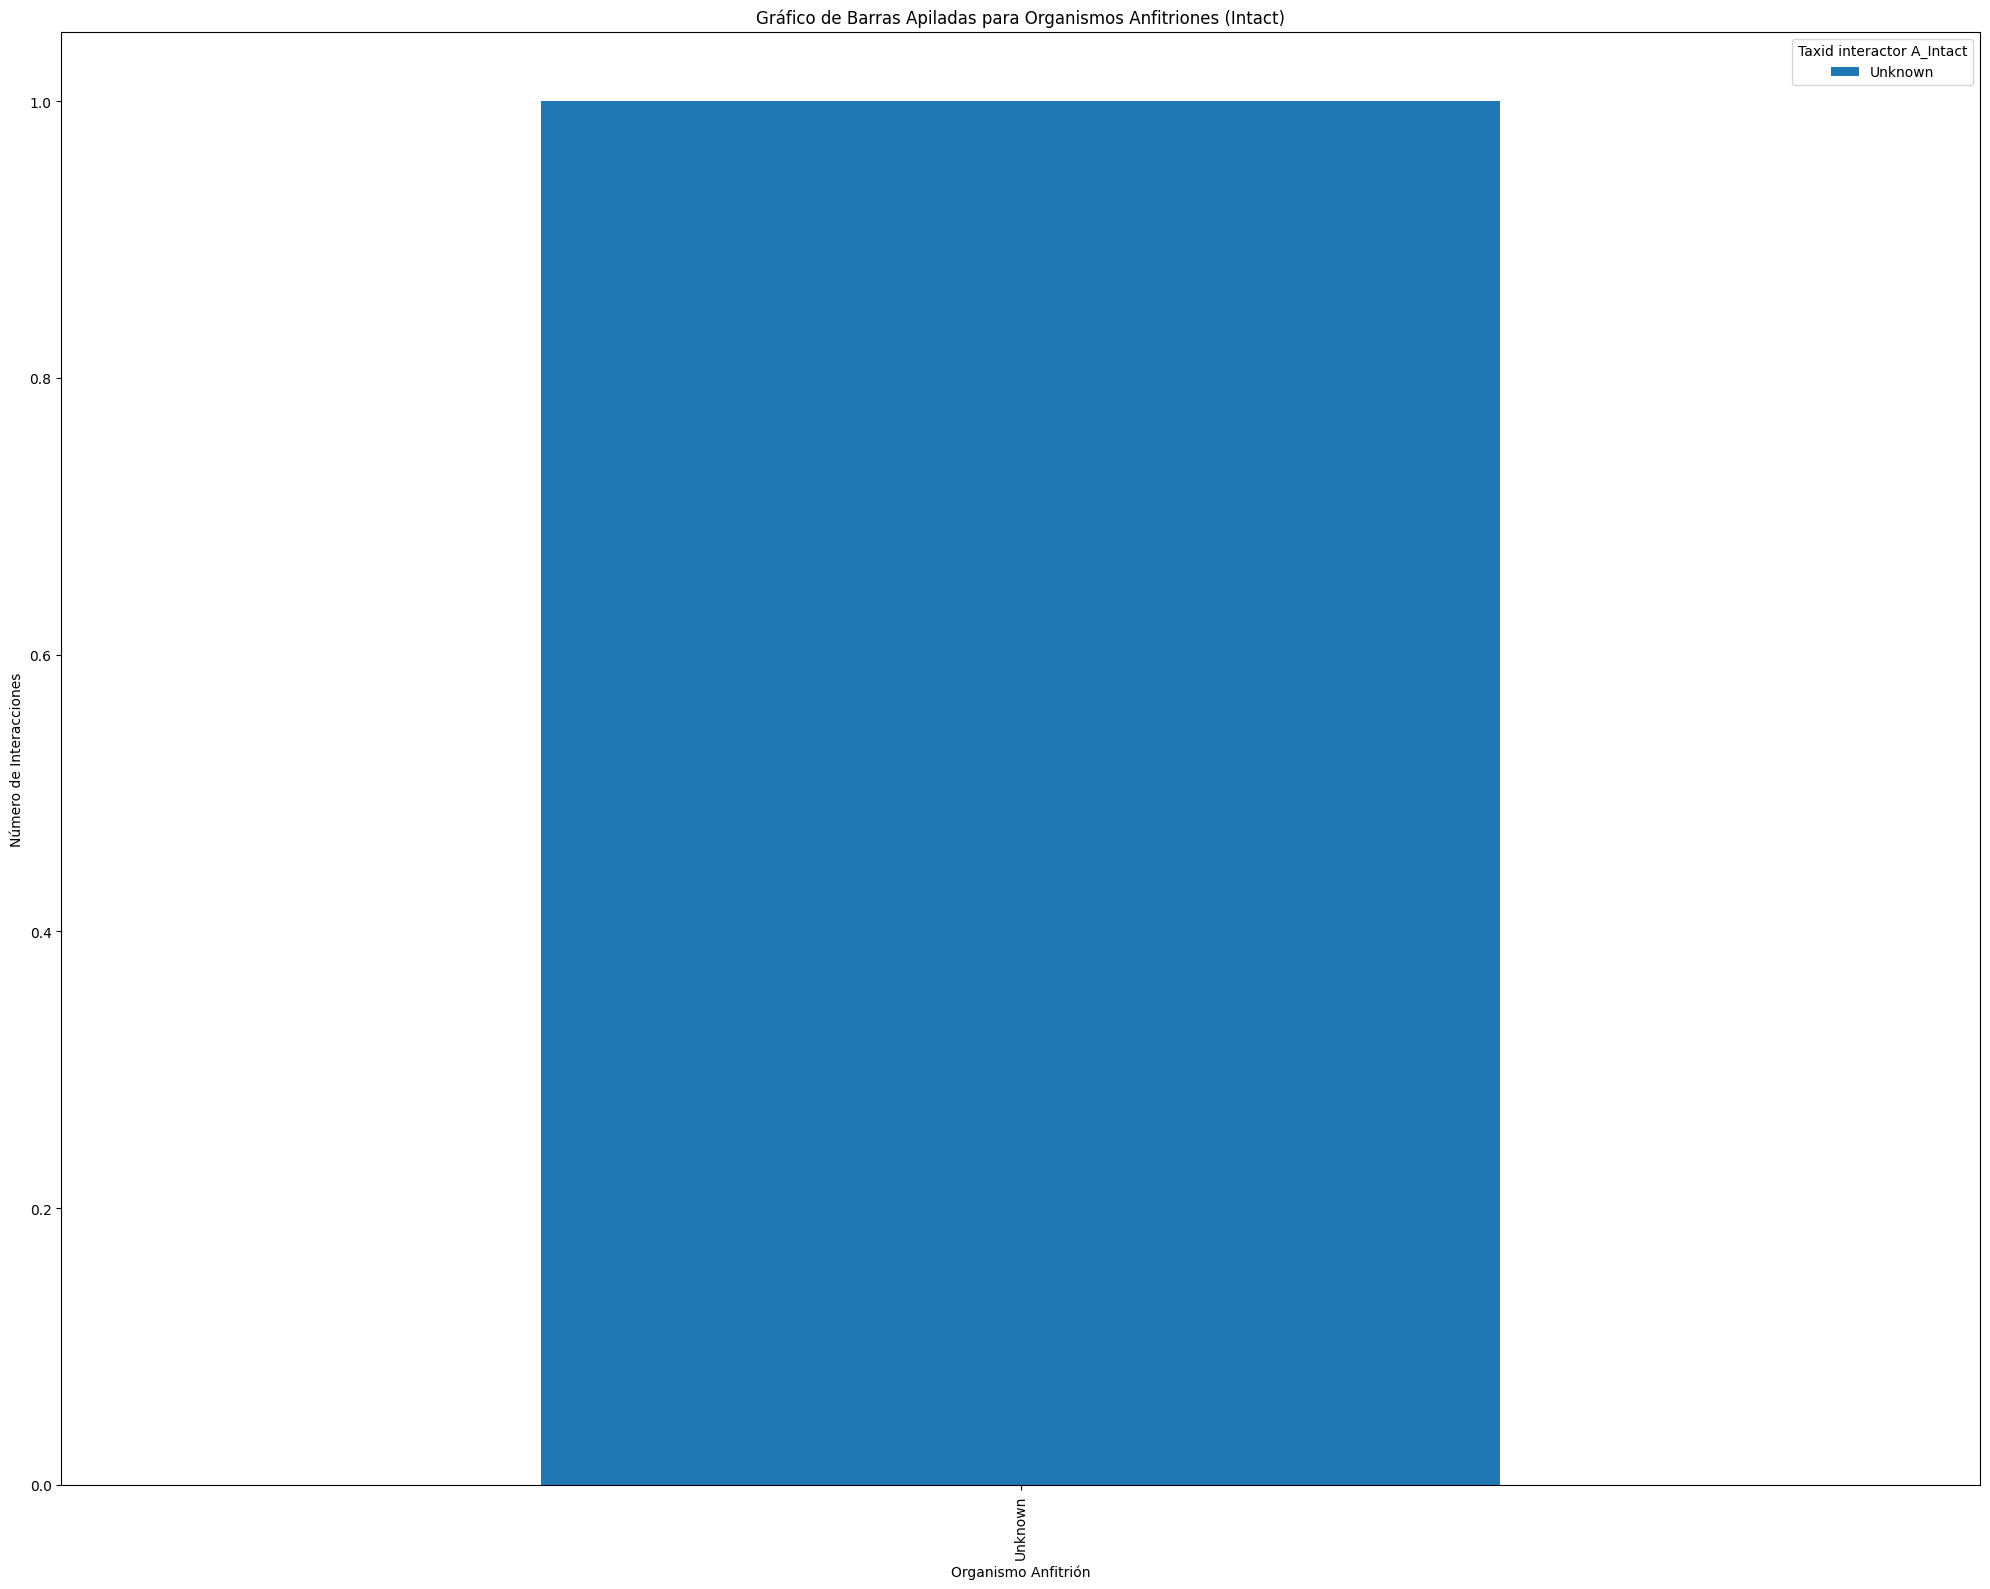

In [11]:
# Supongamos que tienes una columna 'Host organism(s)_Intact' en 'interaction_df'
interaction_df['Host organism(s)_Intact'] = interaction_df['Host organism(s)_Intact'].fillna('Unknown').apply(process_column)

# Expandir los organismos anfitriones
interaction_df = interaction_df.explode('Host organism(s)_Intact')

# Crear una tabla de datos para el gráfico apilado
host_data = interaction_df.groupby(['Host organism(s)_Intact', 'Taxid interactor A_Intact']).size().unstack(fill_value=0)

# Generar el gráfico de barras apiladas
host_data.plot(kind='bar', stacked=True, figsize=(20, 16))
plt.title('Gráfico de Barras Apiladas para Organismos Anfitriones (Intact)')
plt.xlabel('Organismo Anfitrión')
plt.ylabel('Número de Interacciones')
plt.tight_layout()
plt.savefig('stacked_bar_plot_host_organisms.png')
plt.show()

<Figure size 2400x2200 with 0 Axes>

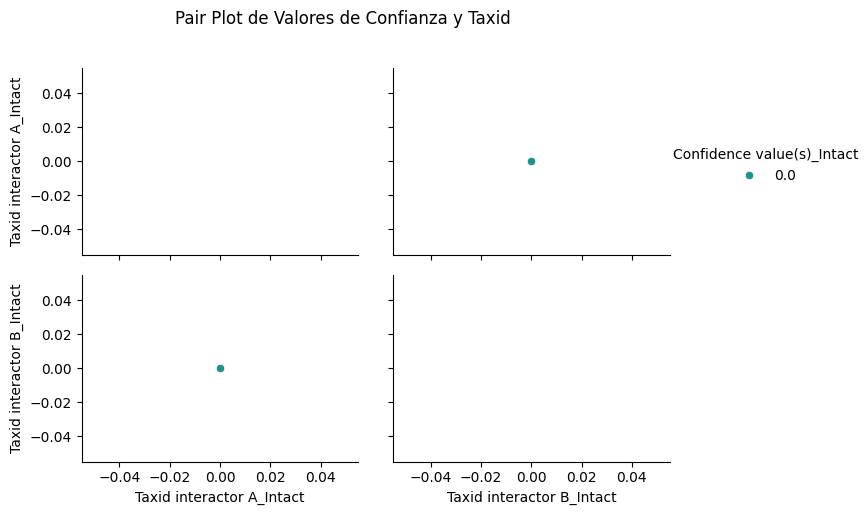

In [12]:
# Crear un DataFrame con valores numéricos para Pair Plot
pair_plot_df = interaction_df[['Taxid interactor A_Intact', 'Taxid interactor B_Intact', 'Confidence value(s)_Intact']].copy()

# Convertir los taxones a categorías para el pairplot
pair_plot_df['Taxid interactor A_Intact'] = pair_plot_df['Taxid interactor A_Intact'].astype('category').cat.codes
pair_plot_df['Taxid interactor B_Intact'] = pair_plot_df['Taxid interactor B_Intact'].astype('category').cat.codes

# Ajustar el tamaño de la figura
plt.figure(figsize=(24, 22))  # Ajusta el tamaño según tus necesidades

# Generar el Pair Plot
pair_plot = sns.pairplot(pair_plot_df, hue='Confidence value(s)_Intact', palette='viridis')

# Añadir título
pair_plot.fig.suptitle('Pair Plot de Valores de Confianza y Taxid', y=1.02)

# Ajustar la posición de la leyenda
pair_plot._legend.set_bbox_to_anchor((1.25, 0.7))  # Ajusta la posición (x, y) según sea necesario

# Ajustar el layout
plt.tight_layout()
plt.savefig('pair_plot_confidence_taxid.png')
plt.show()

Heatmap guardado como 'gene_virus_host_heatmap.png'


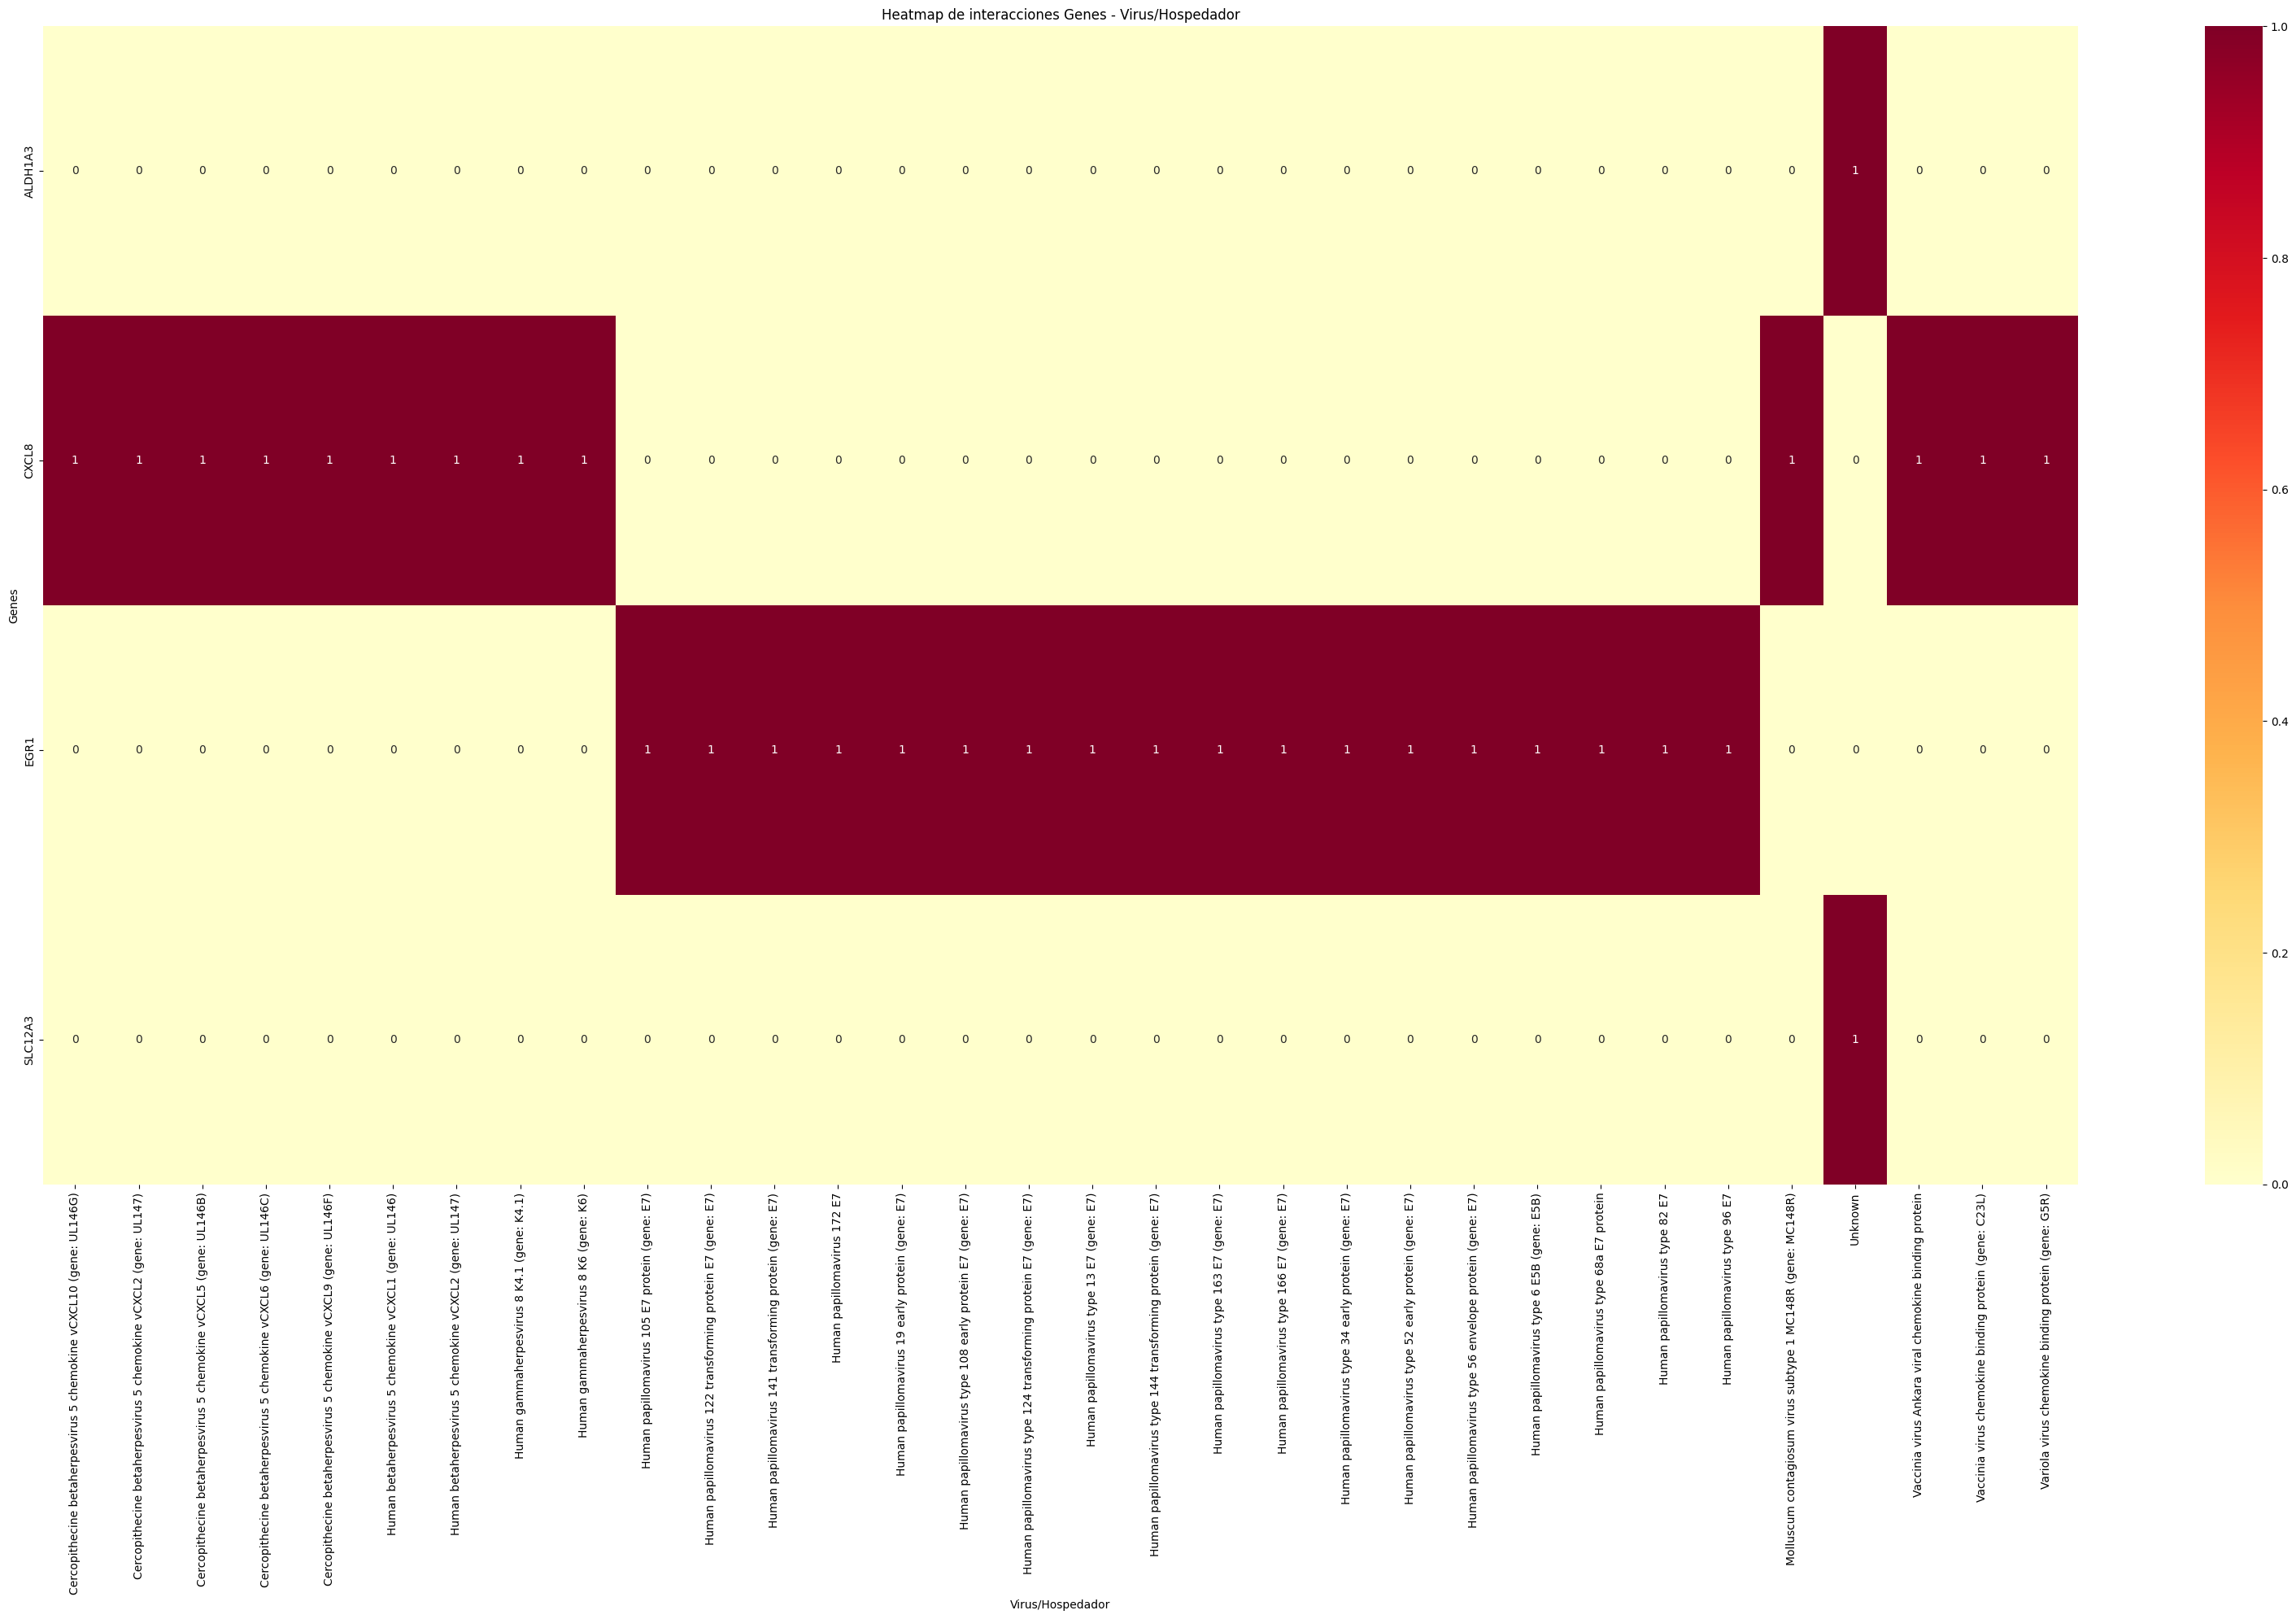

In [13]:
# Procesar las columnas de genes y términos de virus/hospedador para manejar múltiples valores
def process_column(column):
    terms = column.split(';')
    return [term.strip() for term in terms]

# Crear una copia del DataFrame y procesar las columnas relevantes
interaction_df = df[['Genes', 'Virus_Host_Term']].copy()

# Rellenar valores nulos con 'Unknown' y separar los términos
interaction_df['Genes'] = interaction_df['Genes'].fillna('Unknown')
interaction_df['Virus_Host_Term'] = interaction_df['Virus_Host_Term'].fillna('Unknown').apply(process_column)

# Expandir el DataFrame para tener una fila por cada combinación de genes y términos de virus/hospedador
interaction_df = interaction_df.explode('Genes').explode('Virus_Host_Term')

# Crear la matriz de interacciones entre Genes y Virus_Host_Term
interaction_matrix = pd.crosstab(interaction_df['Genes'], interaction_df['Virus_Host_Term'])

# Generar el heatmap
plt.figure(figsize=(32, 20))
sns.heatmap(interaction_matrix, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap de interacciones Genes - Virus/Hospedador')
plt.xlabel('Virus/Hospedador')
plt.ylabel('Genes')
plt.tight_layout()
plt.savefig('gene_virus_host_heatmap.png')
print("Heatmap guardado como 'gene_virus_host_heatmap.png'")


Heatmap guardado como 'top50_gene_virus_host_heatmap.png'


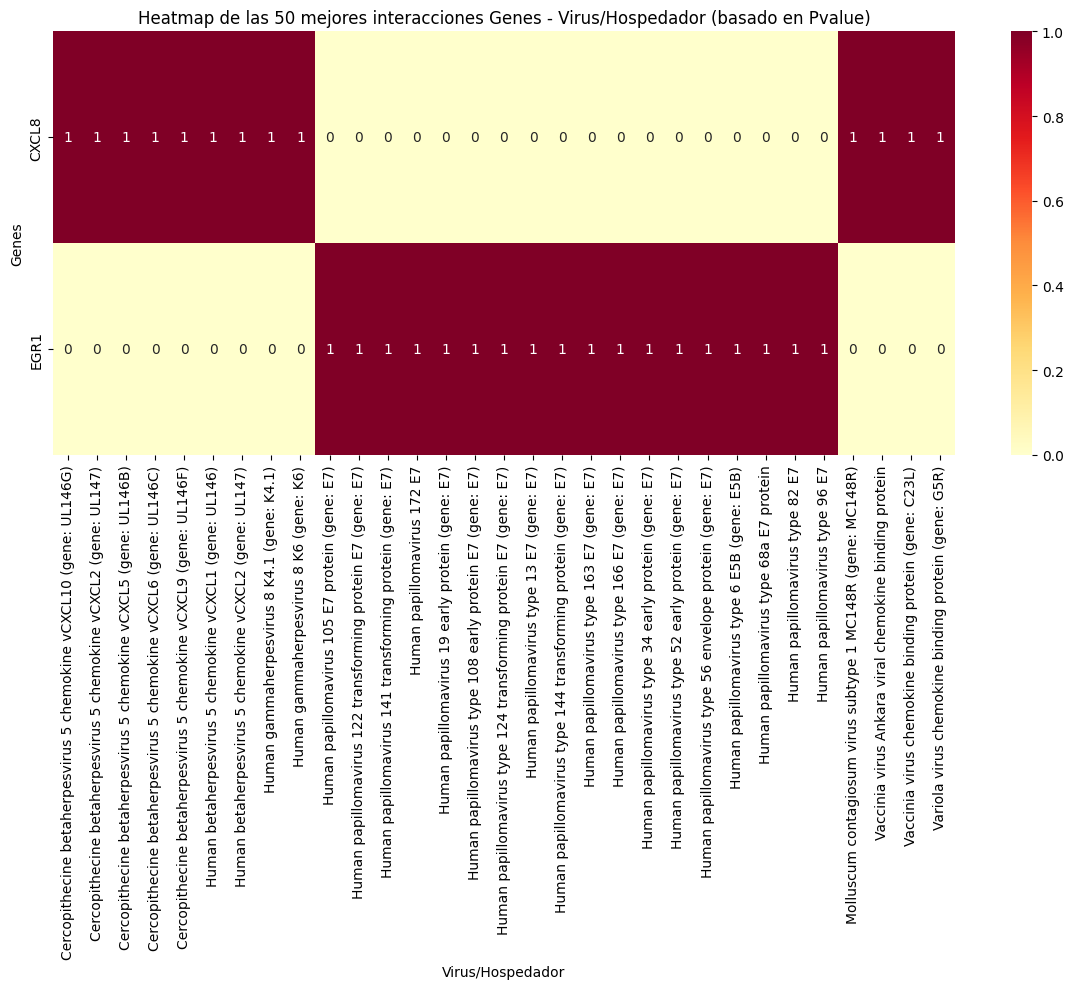

In [14]:
def process_column(column):
    if pd.isna(column):
        return []  # Manejo de valores NaN
    return [item.strip() for item in column.split(';')]

def filter_top_interactions(df, top_n=50):
    df_expanded = df.copy()
    df_expanded['Virus_Host_Term'] = df_expanded['Virus_Host_Term'].apply(process_column)
    df_expanded['Virus_Host_Pvalue'] = df_expanded['Virus_Host_Pvalue'].apply(lambda x: [float(p) if p.strip() else float('nan') for p in process_column(x)])
    
    df_expanded = df_expanded.explode('Genes')
    df_expanded = df_expanded.explode('Virus_Host_Term')
    df_expanded = df_expanded.explode('Virus_Host_Pvalue')
    
    df_expanded = df_expanded.dropna(subset=['Virus_Host_Pvalue'])  # Eliminar filas con Pvalue NaN
    df_expanded['Virus_Host_Pvalue'] = df_expanded['Virus_Host_Pvalue'].astype(float)  # Convertir a float
    
    df_filtered = df_expanded.sort_values(by='Virus_Host_Pvalue').groupby(['Genes', 'Virus_Host_Term']).first().reset_index()
    df_filtered = df_filtered.nsmallest(top_n, 'Virus_Host_Pvalue')
    
    return df_filtered

# Aplicar el filtro para obtener las mejores 50 interacciones
interaction_df = df[['Genes', 'Virus_Host_Term', 'Virus_Host_Pvalue']].copy()
filtered_df = filter_top_interactions(interaction_df, top_n=50)

# Verificar si filtered_df está vacío
if filtered_df.empty:
    print("El DataFrame filtrado está vacío. No se puede generar el heatmap.")
else:
    # Crear la matriz de interacciones entre Genes y Virus_Host_Term
    interaction_matrix = pd.crosstab(filtered_df['Genes'], filtered_df['Virus_Host_Term'])
    
    # Generar el heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(interaction_matrix, annot=True, cmap='YlOrRd', fmt='d')
    plt.title('Heatmap de las 50 mejores interacciones Genes - Virus/Hospedador (basado en Pvalue)')
    plt.xlabel('Virus/Hospedador')
    plt.ylabel('Genes')
    plt.tight_layout()
    plt.savefig('top50_gene_virus_host_heatmap.png')
    print("Heatmap guardado como 'top50_gene_virus_host_heatmap.png'")

Scatter plot guardado como 'top50_gene_virus_host_scatterplot.png'


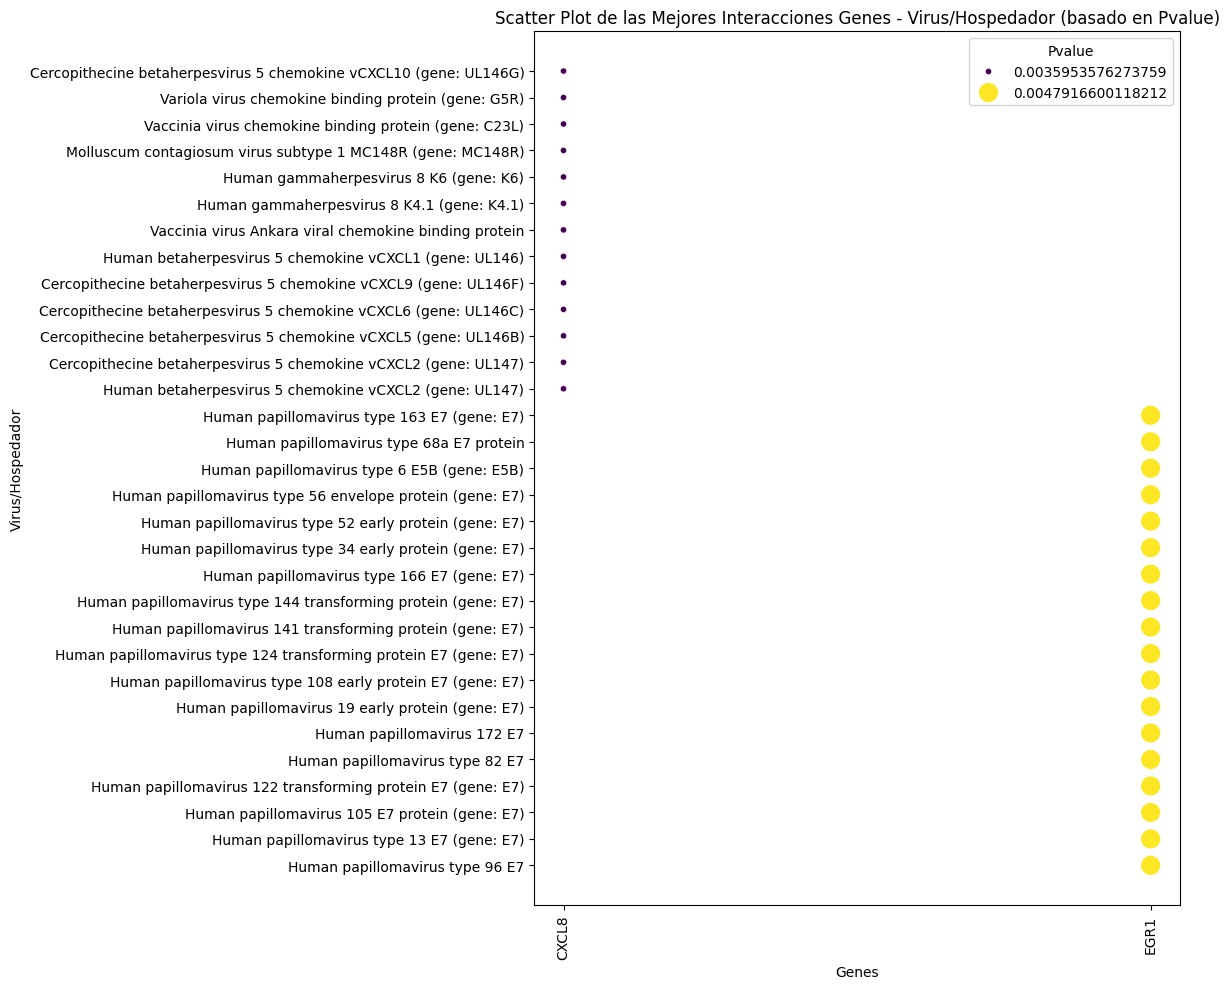

In [15]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=filtered_df, x='Genes', y='Virus_Host_Term', size='Virus_Host_Pvalue', hue='Virus_Host_Pvalue', palette='viridis', sizes=(20, 200))
plt.title('Scatter Plot de las Mejores Interacciones Genes - Virus/Hospedador (basado en Pvalue)')
plt.xlabel('Genes')
plt.ylabel('Virus/Hospedador')
plt.legend(title='Pvalue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('top50_gene_virus_host_scatterplot.png')
print("Scatter plot guardado como 'top50_gene_virus_host_scatterplot.png'")


C:\Users\3060\AppData\Local\Temp\ipykernel_9480\640811309.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=interaction_counts, x='Virus_Host_Term', y='Count', palette='viridis')


Bar plot guardado como 'virus_host_interaction_counts.png'


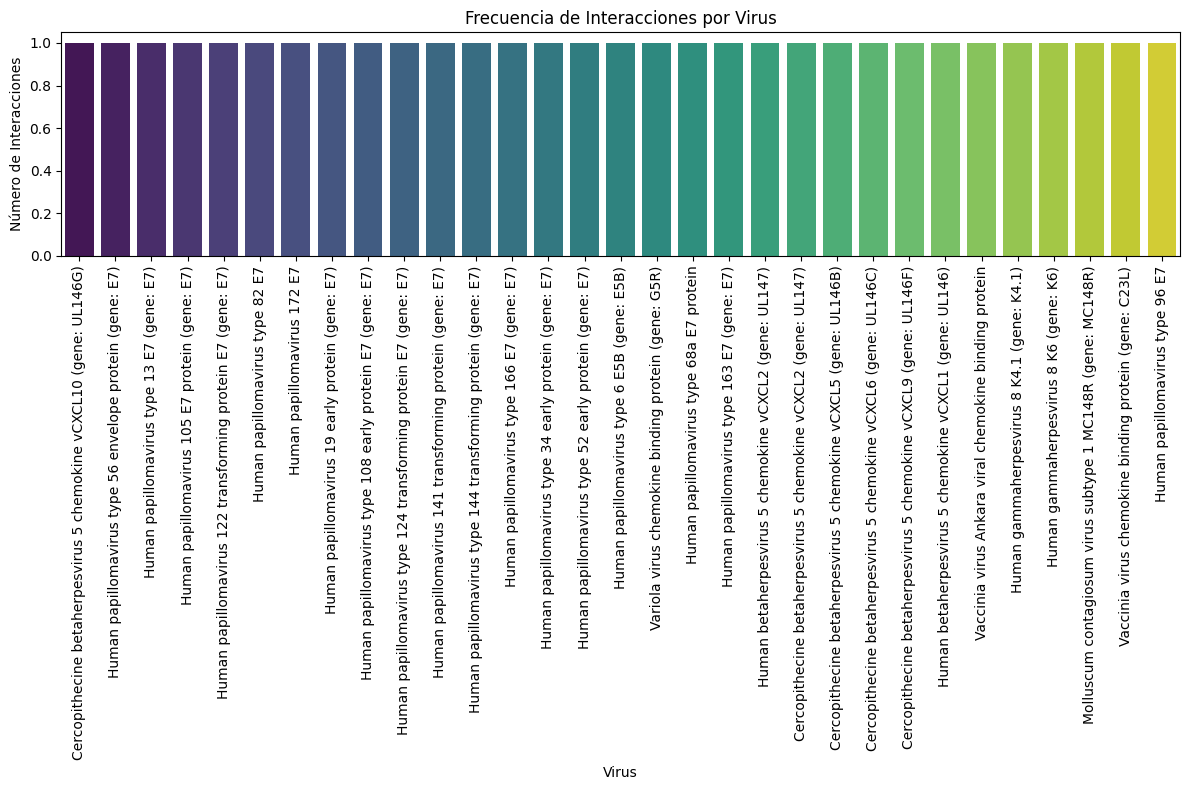

In [16]:

# Contar las interacciones por Virus_Host_Term
interaction_counts = filtered_df['Virus_Host_Term'].value_counts().reset_index()
interaction_counts.columns = ['Virus_Host_Term', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(data=interaction_counts, x='Virus_Host_Term', y='Count', palette='viridis')
plt.title('Frecuencia de Interacciones por Virus')
plt.xlabel('Virus')
plt.ylabel('Número de Interacciones')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('virus_host_interaction_counts.png')
print("Bar plot guardado como 'virus_host_interaction_counts.png'")


In [18]:
# Cargar el archivo CSV
file_path = 'Integracion_con_patógenos_y_enfermedades_Lactobacillus_Acidophillus_KLDS1.0901.csv'
data = pd.read_csv(file_path)

# Crear listas para nodos y aristas
nodos = set()
aristas = []

# Iterar sobre cada fila del DataFrame
for index, row in data.iterrows():
    gene = row['Genes']
    nodos.add((gene, 'Gene'))  # Agregar el gen como nodo

    # Procesar las columnas de enfermedades
    for term, pvalue_column in zip(['DisGeNET_Term', 'GeDiPNet_Term', 'Orphanet_Term'],
                                   ['DisGeNET_Pvalue', 'GeDiPNet_Pvalue', 'Orphanet_Pvalue']):
        if pd.notna(row[term]):  # Verificar que no sea NaN
            enfermedades = row[term].split(';')  # Separar por punto y coma
            pvalues = str(row[pvalue_column]).split(';')  # Separar los valores P correspondientes
            for enfermedad, pvalue in zip(enfermedades, pvalues):
                enfermedad_str = enfermedad.strip()
                if pvalue:  # Asegurarse de que el valor P no sea vacío
                    aristas.append((gene, enfermedad_str, float(pvalue)))  # Crear arista con pvalue
                nodos.add((enfermedad_str, 'Disease'))  # Agregar enfermedad como nodo

    # Procesar las columnas de patógenos
    if pd.notna(row['Virus_Host_Term']):  # Verificar que no sea NaN
        patogenos = row['Virus_Host_Term'].split(';')  # Separar por punto y coma
        pvalues = str(row['Virus_Host_Pvalue']).split(';')  # Separar los valores P correspondientes
        for patogeno, pvalue in zip(patogenos, pvalues):
            patogeno_str = patogeno.strip()
            if pvalue:  # Asegurarse de que el valor P no sea vacío
                aristas.append((gene, patogeno_str, float(pvalue)))  # Crear arista con pvalue
            nodos.add((patogeno_str, 'Pathogen'))  # Agregar patógeno como nodo

# Crear DataFrame de nodos
nodos_df = pd.DataFrame(list(nodos), columns=['Id', 'Type'])

# Guardar el archivo de nodos
nodos_df.to_csv('nodos.csv', index=False)

# Crear DataFrame de aristas
aristas_df = pd.DataFrame(aristas, columns=['Source', 'Target', 'Pvalue'])

# Eliminar duplicados en aristas
aristas_df = aristas_df.drop_duplicates()

# Guardar el archivo de aristas
aristas_df.to_csv('aristas.csv', index=False)